# 08-Projeto-08-Classificacao-de-sinais-de-transito

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import PIL
import pickle
import os
import zipfile

In [3]:
path  = 'datasets/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./datasets/')
zip_object.close()

In [4]:
with open ('datasets/traffic-signs-data/train.p', mode='rb') as training_data:
    train = pickle.load(training_data)
with open ('datasets/traffic-signs-data/test.p', mode='rb') as testing_data:
    test = pickle.load(testing_data)
with open ('datasets/traffic-signs-data/valid.p', mode='rb') as valid_data:
    valid = pickle.load(valid_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']


In [6]:
X_train.shape

(34799, 32, 32, 3)

In [44]:
X_train[i]

array([[[ 75,  72,  84],
        [109,  82,  89],
        [233, 181, 184],
        ...,
        [ 59,  64,  65],
        [ 78,  78,  73],
        [ 82,  81,  68]],

       [[ 77,  73,  85],
        [111,  83,  90],
        [233, 182, 185],
        ...,
        [ 62,  61,  62],
        [ 72,  67,  58],
        [ 90,  87,  67]],

       [[ 77,  72,  83],
        [114,  85,  88],
        [234, 177, 180],
        ...,
        [ 66,  61,  63],
        [ 70,  60,  55],
        [ 76,  72,  59]],

       ...,

       [[ 62,  63,  67],
        [ 90,  67,  73],
        [161, 112, 112],
        ...,
        [ 58,  49,  51],
        [ 54,  48,  50],
        [ 40,  34,  38]],

       [[ 62,  61,  65],
        [ 92,  67,  71],
        [163, 114, 115],
        ...,
        [ 60,  50,  53],
        [ 58,  49,  52],
        [ 42,  34,  37]],

       [[ 65,  61,  68],
        [ 95,  68,  73],
        [164, 113, 113],
        ...,
        [ 62,  51,  52],
        [ 55,  42,  43],
        [ 44,  34,  34]]

1

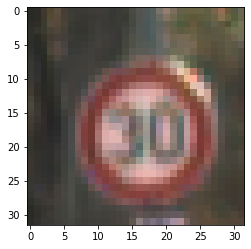

In [7]:
            i = 3100
            plt.imshow(X_train[i])
            y_train[i]

35

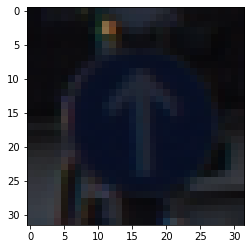

In [8]:
i = 3100
plt.imshow(X_test[i])
y_test[i]

7

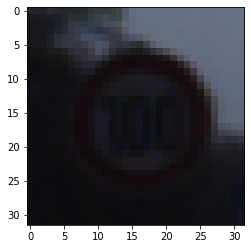

In [9]:
i = 3100
plt.imshow(X_valid[i])
y_valid[i]

In [10]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [11]:
#Convertendo os valores de cores para escala de cinza
X_train_gray = np.sum(X_train / 3, axis=3, keepdims = True)
X_test_gray = np.sum(X_test / 3, axis=3, keepdims = True)
X_valid_gray = np.sum(X_valid / 3, axis=3, keepdims = True)

In [12]:
X_test_gray.shape

(12630, 32, 32, 1)

In [13]:
#normalizando os dados
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_valid_gray_norm = (X_valid_gray - 128) / 128

In [14]:
np.max(X_train_gray), np.min(X_train_gray)

(255.0, 3.666666666666666)

<Figure size 432x288 with 0 Axes>

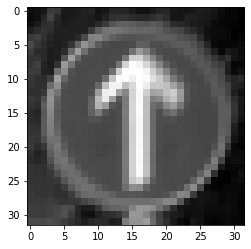

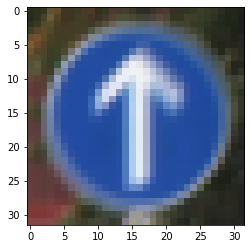

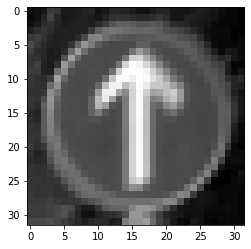

<Figure size 432x288 with 0 Axes>

In [15]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')
plt.figure()

<Figure size 432x288 with 0 Axes>

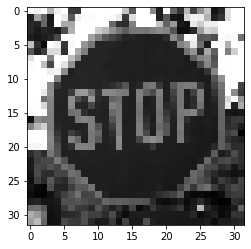

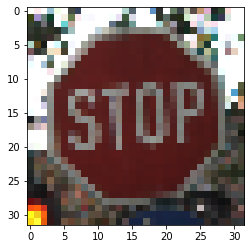

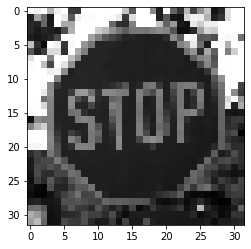

<Figure size 432x288 with 0 Axes>

In [16]:
i = 251
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap='gray')
plt.figure()

<Figure size 432x288 with 0 Axes>

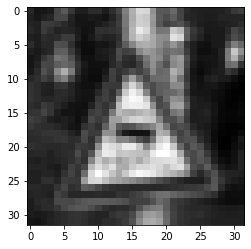

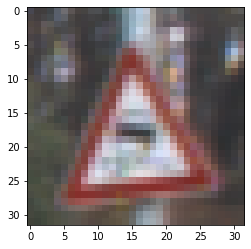

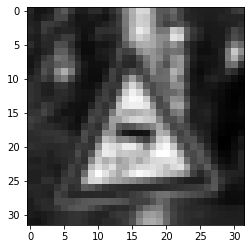

<Figure size 432x288 with 0 Axes>

In [17]:
i = 251
plt.imshow(X_valid_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_valid[i])
plt.figure()
plt.imshow(X_valid_gray_norm[i].squeeze(), cmap='gray')
plt.figure()

In [18]:
#criando o modelo
from tensorflow.keras import layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation='relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))
LeNet.add(layers.Dense(84, activation='relu'))
LeNet.add(layers.Dense(43, activation='softmax'))

LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [19]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [20]:
hist = LeNet.fit(X_train_gray_norm, y_train, 
                batch_size=500, epochs=50,
                validation_data=(X_valid_gray_norm, y_valid))

Epoch 1/50
70/70 [==============================] - 4s 52ms/step - loss: 3.1359 - accuracy: 0.1924 - val_loss: 2.5748 - val_accuracy: 0.3340
Epoch 2/50
70/70 [==============================] - 3s 49ms/step - loss: 1.5963 - accuracy: 0.5589 - val_loss: 1.3163 - val_accuracy: 0.6159
Epoch 3/50
70/70 [==============================] - 3s 46ms/step - loss: 0.8925 - accuracy: 0.7427 - val_loss: 0.9426 - val_accuracy: 0.7086
Epoch 4/50
70/70 [==============================] - 3s 47ms/step - loss: 0.6301 - accuracy: 0.8281 - val_loss: 0.7747 - val_accuracy: 0.7669
Epoch 5/50
70/70 [==============================] - 3s 48ms/step - loss: 0.5070 - accuracy: 0.8612 - val_loss: 0.6988 - val_accuracy: 0.7868
Epoch 6/50
70/70 [==============================] - 3s 49ms/step - loss: 0.4167 - accuracy: 0.8899 - val_loss: 0.6230 - val_accuracy: 0.8093
Epoch 7/50
70/70 [==============================] - 3s 48ms/step - loss: 0.3590 - accuracy: 0.9068 - val_loss: 0.6373 - val_accuracy: 0.8195
Epoch 8/50
70

In [21]:
#avaliação do modelo
score = LeNet.evaluate(X_test_gray_norm, y_test)
print(f'test accuracy {score[1]}')

395/395 [==============================] - 1s 4ms/step - loss: 1.2914 - accuracy: 0.8780
test accuracy 0.8779889345169067


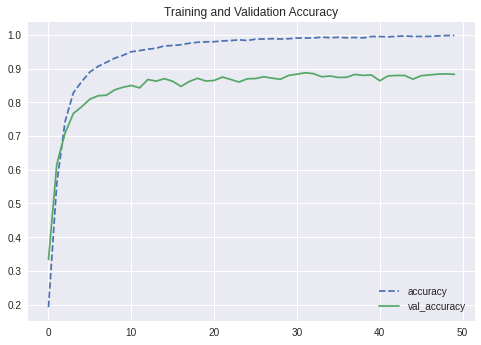

In [33]:
plt.style.use('seaborn')
plt.plot(hist.history['accuracy'],'--', label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

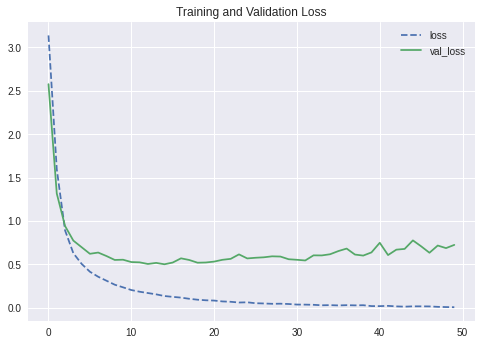

In [34]:
plt.style.use('seaborn')
plt.plot(hist.history['loss'],'--', label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.legend()

<AxesSubplot:>

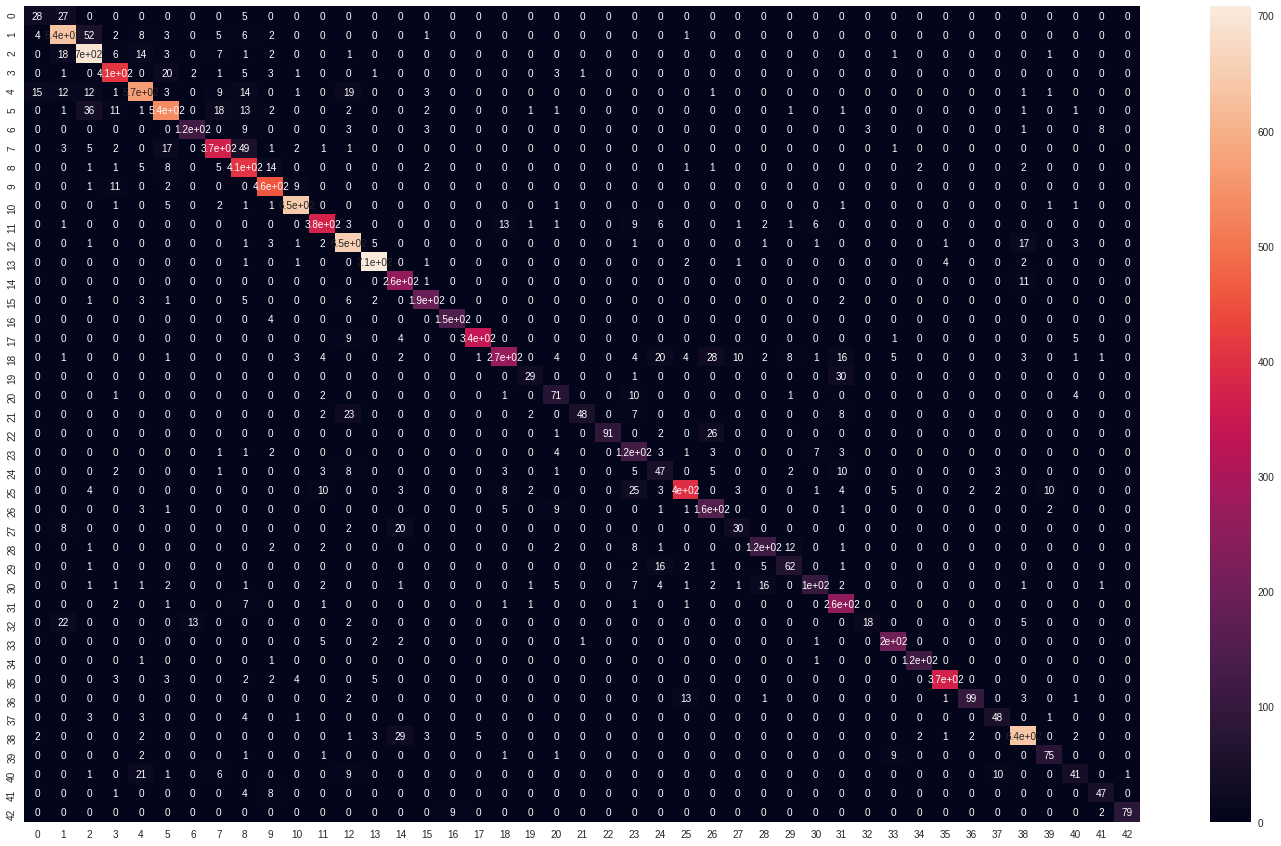

In [38]:
from sklearn.metrics import confusion_matrix
pred = LeNet.predict_classes(X_test_gray_norm)
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(25, 15))
sns.heatmap(cm, annot=True)

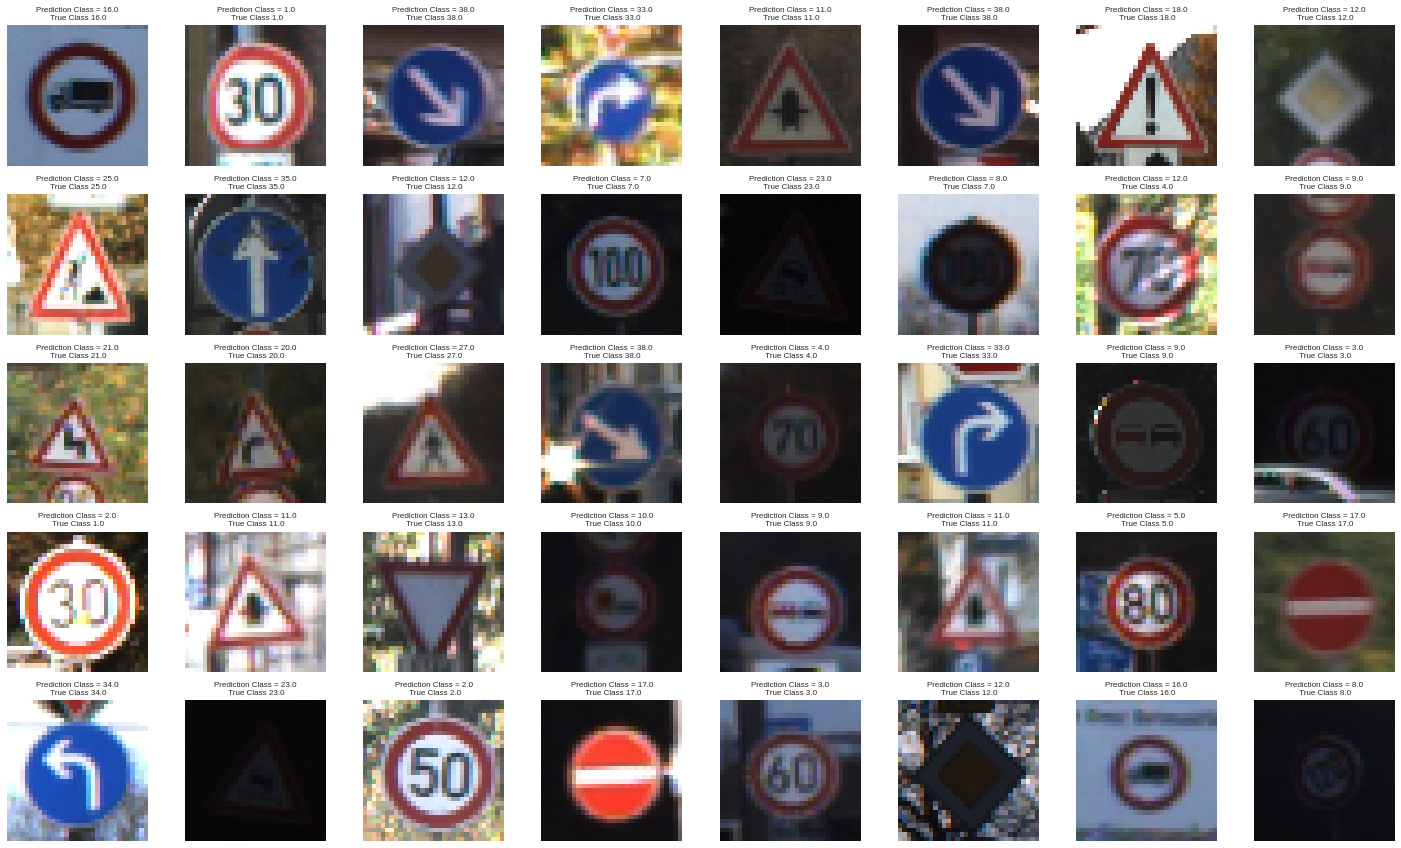

In [43]:
w_grid, l_grid = 8, 5
fig, axes = plt.subplots(l_grid, w_grid, figsize=(25,15))
axes = axes.ravel()


for i in np.arange(0, w_grid * l_grid):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction Class = {:0.1f}\n True Class {:0.1f}'.format(pred[i], y_test[i]), fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2)